# 프로젝트 개요

프로젝트 개선을 위한 데이터 전처리를 다시 하고자 한다.
데이터리안 sql 분석 캠프를 수강하며 funnel 분석, retention 분석 등에 대해 학습하였다. 그 중 세션에 대한 설명도 있었는데 초기 진행했던 프로젝트의 아쉬운 점이 생각나 개선 프로젝트를 진행하게 되었다.

1. 분석 목적은 그대로 회원 구매율 향상을 위한 지표 설정과 인사이트 도출 및 액션 제안으로 설정하였다.
2. 데이터 전처리를 다시 진행한 뒤, funnel 분석을 통하여 지표룰 설정하고 리텐션 분석을 통해 장바구니 재방문 기간을 좀 더 세세히 분석해보기로 한다.

https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop/data

# 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/kaggle_combined_file.csv' # 결합한 kaggel 데이터 불러오기

In [ ]:
pd.read_csv(path)
df = pd.read_csv(path)

## 데이터 탐색

In [ ]:
df1 = df.copy() # 20,692,840개의 데이터
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
df1.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,NaN,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,NaN,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,NaN,roubloff,5.40,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1
9,2019-12-01 00:00:34 UTC,cart,5335,1487580009605365797,NaN,runail,0.40,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554


In [ ]:
df1['event_type'].value_counts()

event_type
view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: count, dtype: int64

In [ ]:
df1['category_code'].value_counts() # 전처리 대상

category_code
appliances.environment.vacuum             149168
stationery.cartrige                        59728
apparel.glove                              52575
furniture.living_room.cabinet              30560
accessories.bag                            24253
furniture.bathroom.bath                    23931
appliances.personal.hair_cutter             5384
accessories.cosmetic_bag                    3644
appliances.personal.massager                3296
appliances.environment.air_conditioner       708
furniture.living_room.chair                  343
sport.diving                                   4
Name: count, dtype: int64

In [ ]:
df1['brand'].value_counts() #  총 273개의 브랜드

brand
runail       1528908
irisk        1033852
masura        861763
grattol       852591
bpw.style     434813
              ...   
shifei             9
vl-gel             7
dessata            6
gena               3
pueen              1
Name: count, Length: 273, dtype: int64

- event_time : datetime 형식의 문자열
- event_type : view - cart - remove_from_cart - purchase 총 4 단계
- product_id :
- category_id :
- category_code : 뷰티 이커머스와 이질적인 카테고리들이 들어있다. 뷰티와 관련된 카테고리는 보이지 않음
- brand : 상품의 brand, 소문자로 입력
- price : 상품의 가격
- user_id : 유저 고유 id
- user_session : 세션 id, 세션 타임아웃 시간이 명시되어 있지 않아 정확히는 알 수 없음.

In [ ]:
df1.isnull().sum() # 결측치 확인

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

In [ ]:
df1.duplicated().sum() # 중복 데이터 확인

1109098

In [ ]:
df1[df1.duplicated(keep=False)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
36,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,NaN,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
37,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,NaN,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
54,2019-12-01 00:02:49 UTC,cart,5693501,1487580009445982239,NaN,NaN,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
55,2019-12-01 00:02:49 UTC,cart,5693501,1487580009445982239,NaN,NaN,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
59,2019-12-01 00:03:08 UTC,remove_from_cart,5839671,1487580005671109489,NaN,masura,2.19,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
...,...,...,...,...,...,...,...,...,...
20692771,2020-01-31 23:55:32 UTC,remove_from_cart,5723515,1487580005134238553,NaN,runail,2.35,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb
20692829,2020-01-31 23:59:43 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
20692830,2020-01-31 23:59:43 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
20692835,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19583742 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ GB


In [ ]:
df1.reset_index(drop = True, inplace = True)

In [ ]:
df1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
19583737,2020-01-31 23:59:52 UTC,view,5796984,1487580005671109489,NaN,masura,1.73,417102560,dcf90ff3-a246-4b00-b39a-83e6444a0769
19583738,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
19583739,2020-01-31 23:59:53 UTC,view,5875432,2084144451428549153,NaN,NaN,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80
19583740,2020-01-31 23:59:57 UTC,remove_from_cart,5820745,1487580006317032337,NaN,NaN,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


### 1. category_code

이전에 category_code는 다른 데이터가 합쳐진 데이터라는 것을 확인했었다. 다시 category_code,id와 product_id를 비교한 데이터를 확인하자.

In [ ]:
is_category_data = df1[df1['category_code'].notnull()]
is_category_data['category_id'].value_counts()

category_id
1487580006350586771    145812
1487580013053083824     56776
2007399943458784057     49156
2193074740619379535     30121
1487580010695884882     24085
2193074740686488401      9793
1487580011970953351      8614
1487580008070251489      5324
2018287324474901238      3547
1921723506584715388      3541
2235524499216793855      3249
1487580012147114126       809
1487580012071616651       674
1783999067181810204       604
1487580012759482531       398
2022622168218599898       338
1487580008221246441        87
1487580012549767321         4
Name: count, dtype: int64

In [ ]:
no_category_data = df1[df1['category_code'].isnull()]

In [ ]:
# 각 데이터 세트에서 category_id의 고유값 추출
id_with_code = set(is_category_data['category_id'])
id_without_code = set(no_category_data['category_id'])

# 두 세트의 category_id 고유값들의 교집합 구하기
intersection = id_with_code.intersection(id_without_code)

# 결과 출력
if intersection:
    print(f"겹치는 category_id 존재: {intersection}")
else:
    print("겹치는 category_id가 없음")

겹치는 category_id가 없음


In [ ]:
# 각 데이터 세트에서 product_id의 고유값 추출
p_id_with_code = set(is_category_data['product_id'])
p_id_without_code = set(no_category_data['product_id'])

# 두 세트의 product_id 고유값들의 교집합 구하기
intersection = p_id_with_code.intersection(p_id_without_code)

# 결과 출력
if intersection:
    print(f"겹치는 product_id 존재: {intersection}")
else:
    print("겹치는 product_id 없음")

겹치는 product_id 존재: {5712520, 5877529, 5856184, 5712518}


In [ ]:
result_df =df1[df1['product_id'].isin(intersection)]
result_df = result_df.sort_values(by='product_id')
result_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
11332656,2019-10-29 13:48:31 UTC,remove_from_cart,5712518,1487580009445982239,NaN,NaN,8.89,414152930,40c3e333-2318-4156-a058-5400140c0306
9724322,2019-10-16 04:17:31 UTC,view,5712518,1487580009445982239,NaN,NaN,8.89,558289943,4d14bc09-fcf1-4f6a-b1af-921fb47f2cc8
9673219,2019-10-15 15:48:16 UTC,remove_from_cart,5712518,1487580009445982239,NaN,NaN,8.89,551830532,bb8eaa34-6c64-4f72-98e1-356c0cdc1698
9667333,2019-10-15 14:47:00 UTC,remove_from_cart,5712518,1487580009445982239,NaN,NaN,8.89,480166129,4ed637f7-a350-4305-ace5-8d4c63523122
9666128,2019-10-15 14:37:51 UTC,cart,5712518,1487580009445982239,NaN,NaN,8.89,480166129,4ed637f7-a350-4305-ace5-8d4c63523122
...,...,...,...,...,...,...,...,...,...
11559146,2019-10-31 11:31:28 UTC,view,5877529,1487580010645553231,NaN,jessnail,98.41,566098023,2b2c6bae-c6d7-4b2c-a44b-1be9fd82a7eb
3439861,2019-11-01 19:00:01 UTC,view,5877529,1487580010645553231,NaN,jessnail,98.41,526638162,1ce92b45-e242-4b95-9842-806eb5de67a5
7773224,2019-10-01 09:35:45 UTC,view,5877529,1487580010645553231,NaN,jessnail,98.41,536640765,fa5a9f0d-5c5c-4286-be68-a17232c4c0ab
11542517,2019-10-31 09:19:13 UTC,view,5877529,1487580010645553231,NaN,jessnail,98.41,565317022,cffbed9c-6e2c-4522-be77-8b583f6d5f7d


- 전처리 전 데이터 탐색을 위해 no_category_data 데이터를 통해 탐색을 이어가자

In [ ]:
df2 = df1[df1['category_code'].isnull()]
df2.drop('category_code', axis=1, inplace=True)
df2

<ipython-input-6-7c8a4e69afa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('category_code', axis=1, inplace=True)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...
20692834,2020-01-31 23:59:52 UTC,view,5796984,1487580005671109489,masura,1.73,417102560,dcf90ff3-a246-4b00-b39a-83e6444a0769
20692835,2020-01-31 23:59:52 UTC,remove_from_cart,5886774,1487580006317032337,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
20692837,2020-01-31 23:59:53 UTC,view,5875432,2084144451428549153,NaN,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80
20692838,2020-01-31 23:59:57 UTC,remove_from_cart,5820745,1487580006317032337,NaN,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


### 2. brand

In [ ]:
df2['brand'].value_counts()

brand
runail       1409271
irisk         950415
grattol       811224
masura        801528
bpw.style     409879
              ...   
vl-gel             7
shifei             7
dessata            6
gena               3
pueen              1
Name: count, Length: 269, dtype: int64

In [ ]:
check_brand = df2[df2['brand'] == 'bpw.style']
check_brand['product_id'].value_counts()

product_id
5833334    17343
5833330    15506
5848909    14271
5833318    13747
5833325    11907
           ...  
5856777        4
5868585        1
5883282        1
5868587        1
5868588        1
Name: count, Length: 314, dtype: int64

In [ ]:
# 같은 product_id를 가졌으나 brand가 있는것 / 없는 것

is_brand_data = df1[df1['brand'].notnull()]
no_brand_data = df1[df1['brand'].isnull()]

In [ ]:
# 각 데이터 세트에서 product_id 고유값 추출
id_with_brand = set(is_brand_data['product_id'])
id_without_brand = set(no_brand_data['product_id'])

# 두 세트의 product_id 고유값들의 교집합 구하기
intersection = id_with_brand.intersection(id_without_brand)

# 결과 출력
if intersection:
    print(f"겹치는 product_id 존재: {intersection}")
else:
    print("겹치는 product_id 없음")

겹치는 product_id 존재: {5898240, 5898241, 5898242, 5898243, 5898244, 5898245, 5898246, 5898247, 5898252, 5898253, 5898255, 5898256, 5898257, 5898258, 5898259, 5898260, 5898261, 5898262, 5898264, 5898265, 5898266, 5865501, 5898270, 5898271, 5898272, 5865524, 5800002, 5800006, 5800007, 5734475, 5734477, 5734479, 5734480, 5734483, 5734484, 5734485, 5734486, 5603418, 5734491, 5734492, 5734493, 5734495, 5734496, 5734497, 5734498, 5734499, 5734500, 5734501, 5734502, 5734504, 5734505, 5734507, 5734508, 5734509, 5734510, 5734512, 5734517, 5734518, 5734519, 5865592, 5898361, 5898362, 5898363, 5898364, 5898365, 5898366, 5898367, 5898368, 5898369, 5898370, 5898371, 5898372, 5898373, 5898374, 5898375, 5898376, 5898377, 5898378, 5898379, 5898380, 5898381, 5898382, 5898383, 5898384, 5898385, 5898386, 5898387, 5734539, 5734542, 5734543, 5734544, 5734545, 5734546, 5734547, 5734550, 5734556, 5734552, 5734554, 5898399, 5734555, 5734557, 5734558, 5734559, 5734560, 5734563, 5734561, 5734562, 5734568, 5734569,

In [ ]:
df2['brand'].fillna(df2.groupby('product_id')['brand'].transform('first'), inplace=True)

<ipython-input-7-f70adc2af2bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['brand'].fillna(df2.groupby('product_id')['brand'].transform('first'), inplace=True)


In [ ]:
df2.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
brand           8094816
price                 0
user_id               0
user_session       4039
dtype: int64

- 20만개의 brand 결측치만 채울 수 있었음. 나머지는 unknown으로 채우기

In [ ]:
df2['brand'].fillna('unknown', inplace=True)

<ipython-input-8-99cd6be9a038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['brand'].fillna('unknown', inplace=True)


In [ ]:
df2.isnull().sum()

event_time         0
event_type         0
product_id         0
category_id        0
brand              0
price              0
user_id            0
user_session    4039
dtype: int64

### 3. price

In [ ]:
df2['price'].min(), df2['price'].max()

(-79.37, 327.78)

In [ ]:
negative_prices = df2[df2['price'] < 0]['price']
negative_prices.value_counts()

price
-23.81    36
-15.87    34
-47.62    30
-7.94     12
-79.37    12
Name: count, dtype: int64

In [ ]:
negative_data = df2[df2['price'] < 0]
negative_data

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
656404,2019-12-06 08:44:06 UTC,purchase,5670257,1487580014042939619,unknown,-15.87,410016187,2414f145-f7fa-473f-9d74-41e5694178a0
891163,2019-12-08 12:38:35 UTC,purchase,5670257,1487580014042939619,unknown,-15.87,579811230,001d3051-07af-1cef-f5e4-10443d9742b9
1546186,2019-12-13 08:44:49 UTC,purchase,5716859,1487580014042939619,unknown,-47.62,414087247,6617078d-899a-4b89-8538-b70e505bff38
1578540,2019-12-13 13:48:10 UTC,purchase,5716857,1487580014042939619,unknown,-23.81,584773479,a3f156d9-b7fc-444d-8899-920715cca75d
2028783,2019-12-17 10:37:03 UTC,purchase,5670257,1487580014042939619,unknown,-15.87,584498077,ecbf0f7c-3c10-42e8-9af6-1397b5428afa
...,...,...,...,...,...,...,...,...
18566304,2020-01-24 21:30:42 UTC,purchase,5716859,1487580014042939619,unknown,-47.62,605668162,1609dc0c-7112-468d-8b5c-1cdcabd4f674
18784029,2020-01-26 18:55:52 UTC,purchase,5716861,1487580014042939619,unknown,-79.37,606448681,466cd335-b273-49a4-aefb-3077b5fcd87e
18844883,2020-01-27 08:04:32 UTC,view,5716861,1487580014042939619,unknown,-79.37,531900924,38fe5484-6b5f-44e6-8092-3713df449df7
18922160,2020-01-27 14:39:33 UTC,purchase,5716859,1487580014042939619,unknown,-47.62,544827743,9bddc864-778a-987e-7f59-a98410752421


In [ ]:
negative_data['event_type'].value_counts() # 음수 구매 값은 환불값이 아닌 걸까?

event_type
purchase            119
remove_from_cart      3
view                  2
Name: count, dtype: int64

In [ ]:
negative_data['product_id'].value_counts()

product_id
5716857    36
5670257    34
5716859    30
5716855    12
5716861    12
Name: count, dtype: int64

In [ ]:
positive_data = df2[df2['price'] > 0]

In [ ]:
negative_p_id = set(negative_data['product_id'])
positive_p_id = set(positive_data['product_id'])

intersection = negative_p_id.intersection(positive_p_id)

if intersection:
    print(f"겹치는 category_id 존재: {intersection}")
else:
    print("겹치는 category_id가 없음")

겹치는 category_id가 없음


In [ ]:
negative_p_id

{5670257, 5716855, 5716857, 5716859, 5716861}

- 같은 product_id가 없는 것으로 보아 환불 데이터가 아니라 그냥 해당 product의 값인 것 같다. 해당 값은 이상치로 보고 삭제하면 될 것 같다.

In [ ]:
df2 = df2[df2['price'] >= 0]

그럼 가격이 0인건 뭘까..?

In [ ]:
zero_prices = df2[df2['price'] == 0]
zero_prices['event_type'].value_counts()

- 0원에 구매한 건 1개밖에 없네..?

In [ ]:
zero_prices[zero_prices['event_type'] == 'purchase']

In [ ]:
df2[df2['product_id'] == 5911801]['price'].value_counts()

In [ ]:
df2[df2['user_session'] == '3b8c48f2-b4bd-400e-a786-eace723dbffa']['user_id'].value_counts()

In [ ]:
df2[df2['user_session'] == '3b8c48f2-b4bd-400e-a786-eace723dbffa']['event_type'].value_counts()

- 음수 값이었던 negative_data와 다르게, 가격이 0인 상품은 가격이 여러가지이다. price 컬럼이 당시(현재)의 변동 가격이므로 상품 별 가격 변동이 모두 담겨있는 것이었다. 0인 값은 할인을 적용받아 구매한 것인지, 이벤트로 진행 된 것인지 명확히 알 수는 없지만, 당시 기간 동안의 가격이다.

In [ ]:
len(zero_prices)

In [ ]:
zero_prices['product_id'].value_counts()

- 상품 가격이 0이었던 때 상품을 보고, cart에 담는 등 총 event가 일어난 수는 8만개나 되지만 실제 구매를 한 고객은 1명만 존재한다.

상품 가격은 기간 별로 다르기 때문에, 가장 높은 가격을 정가라고 생각하여 regular price 컬럼을 하나 추가하기로 한다.

### user_session

In [ ]:
df2['user_session'].value_counts()

In [ ]:
# 세션은 유저와 세션을 함께 봐야 한다.

a = df2.groupby('user_id')['user_session'].value_counts()
pd.DataFrame(a)

In [ ]:
no_session_data = df2[df2['user_session'].isnull()]

In [ ]:
no_session_data['event_type'].value_counts()

In [ ]:
no_session_data[no_session_data['event_type'] == 'cart']['product_id'].value_counts()

In [ ]:
df2_1 = df2.drop('user_session', axis=1)
no_session_data_1 = no_session_data.drop('user_session', axis=1)

In [ ]:
# 두 데이터프레임에서 일치하는 행 찾기
common_rows = pd.merge(df2_1, no_session_data_1, how='inner')

# 결과 출력
if common_rows.empty:
  print("두 데이터프레임에 일치하는 행이 없습니다.")
else:
  print("두 데이터프레임에 일치하는 행:")
  print(common_rows)

두 데이터프레임에 일치하는 행:
                   event_time        event_type  product_id  \
0     2019-12-01 03:49:31 UTC              cart     5561488   
1     2019-12-01 03:49:33 UTC              cart     5561488   
2     2019-12-01 05:19:33 UTC  remove_from_cart     5742415   
3     2019-12-01 05:19:43 UTC  remove_from_cart     5778747   
4     2019-12-01 05:19:54 UTC              cart       43191   
...                       ...               ...         ...   
4034  2020-01-31 17:48:16 UTC              cart     5790689   
4035  2020-01-31 17:48:18 UTC              cart     5790689   
4036  2020-01-31 17:48:24 UTC  remove_from_cart     5790689   
4037  2020-01-31 17:48:30 UTC              cart     5790689   
4038  2020-01-31 18:05:46 UTC              cart     5865019   

              category_id     brand  price    user_id  
0     1487580007952810971   unknown  10.63  403325248  
1     1487580007952810971   unknown  10.63  403325248  
2     1487580009051717646   unknown  34.90  580025231  
3

- 세션 결측치 행이 세션을 제거한 데이터와 값이 같으면 세션을 제거해봐도 되지 않을까 생각했는데, 전부 일치하는 것이 아니라서 그냥 결측치를 no_session으로 채우기로 한다.

In [ ]:
df2.fillna('no_session', inplace=True)

<ipython-input-13-f63523484dd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna('no_session', inplace=True)


## 데이터 전처리

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19240686 entries, 0 to 20692839
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.3+ GB


In [ ]:
df2.isnull().sum()

event_time      0
event_type      0
product_id      0
category_id     0
brand           0
price           0
user_id         0
user_session    0
dtype: int64

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/beauty_data_1.csv', index=False) # 세션 만료를 대비한 데이터 저장

- 결측치, 중복값 등을 모두 제거하고 필요 없는 컬럼도 정리해주었다.
이번엔 필요한 컬럼을 만들어서 분석을 위한 데이터 가공을 완료하기로 한다.
---
컬럼
- date
- time
- event_type
- product_id
- category_id
- brand
- price
- original_price
- user_id
- user_session

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/beauty_data_1.csv')

In [ ]:
df['date'] = pd.to_datetime(df['event_time']).dt.date
df['time'] = pd.to_datetime(df['event_time']).dt.time

In [ ]:
df.drop('event_time', axis=1, inplace=True)

In [ ]:
# regular_price 컬럼 추가

# 각 product_id r가장 높은 가격
regular_price = df.groupby('product_id')['price'].max()
regular_price

product_id
3752       15.71
3762       19.37
3763       16.03
3771       15.08
3773       12.54
           ...  
5932582     6.02
5932583     6.02
5932584     6.02
5932585     6.33
5932595     0.00
Name: price, Length: 53946, dtype: float64

In [ ]:
# 'regular_price' 컬럼을 추가하고 모든 값을 NaN으로 초기화
df['regular_price'] = np.nan

# regular_price Series를 순회하며 해당 product_id를 가진 행에 값 할당
for product_id, price in regular_price.items():
    df.loc[df['product_id'] == product_id, 'regular_price'] = price

In [ ]:
df

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,regular_price
0,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01,00:00:00,6.27
1,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01,00:00:00,29.05
2,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01,00:00:02,1.19
3,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01,00:00:05,0.79
4,view,5824148,1487580005511725929,unknown,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01,00:00:07,5.56
...,...,...,...,...,...,...,...,...,...,...
19240681,view,5796984,1487580005671109489,masura,1.73,417102560,dcf90ff3-a246-4b00-b39a-83e6444a0769,2020-01-31,23:59:52,1.73
19240682,remove_from_cart,5886774,1487580006317032337,unknown,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020-01-31,23:59:52,1.59
19240683,view,5875432,2084144451428549153,unknown,2.05,423651741,fb42a963-abef-4c4f-b1ba-f5812dd54e80,2020-01-31,23:59:53,2.05
19240684,remove_from_cart,5820745,1487580006317032337,unknown,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47,2020-01-31,23:59:57,2.22


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/beauty_data_fin.csv', index=False)

# 분석

분석 목적 : 회원 구매율 향상


In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/beauty_data_fin.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19240686 entries, 0 to 19240685
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_type     object 
 1   product_id     int64  
 2   category_id    int64  
 3   brand          object 
 4   price          float64
 5   user_id        int64  
 6   user_session   object 
 7   date           object 
 8   time           object 
 9   regular_price  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.4+ GB


In [ ]:
df.head()

,event_type,product_id,category_id,brand,price,user_id,user_session,date,time,regular_price
0,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01,00:00:00,6.27
1,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01,00:00:00,29.05
2,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01,00:00:02,1.19
3,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01,00:00:05,0.79
4,view,5824148,1487580005511725929,unknown,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01,00:00:07,5.56


In [ ]:
df = df[['date', 'time', 'event_type', 'product_id', 'category_id', 'brand', 'price', 'regular_price', 'user_id', 'user_session']]

In [ ]:
df.head()

,date,time,event_type,product_id,category_id,brand,price,regular_price,user_id,user_session
0,2019-12-01,00:00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01,00:00:00,view,5764655,1487580005411062629,cnd,29.05,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01,00:00:02,cart,4958,1487580009471148064,runail,1.19,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01,00:00:05,view,5848413,1487580007675986893,freedecor,0.79,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01,00:00:07,view,5824148,1487580005511725929,unknown,5.56,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


## 1. 상황 파악 : 회원 구매율

In [22]:
purchase_df = df[df['event_type'] == 'purchase']

purchase_df

,date,time,event_type,product_id,category_id,brand,price,regular_price,user_id,user_session,week
539,2019-12-01,00:17:50,purchase,4554,1487580010796548183,runail,0.38,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9,2019-11-25/2019-12-01
540,2019-12-01,00:17:50,purchase,4600,1487580010796548183,runail,0.38,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9,2019-11-25/2019-12-01
541,2019-12-01,00:17:50,purchase,4607,1487580010796548183,runail,0.38,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9,2019-11-25/2019-12-01
542,2019-12-01,00:17:50,purchase,4640,1487580011157258342,runail,0.37,0.37,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9,2019-11-25/2019-12-01
543,2019-12-01,00:17:50,purchase,4689,1487580010796548183,runail,0.38,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9,2019-11-25/2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...
19240652,2020-01-31,23:58:26,purchase,5730206,1487580005092295511,unknown,10.32,10.32,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e,2020-01-27/2020-02-02
19240653,2020-01-31,23:58:26,purchase,5861342,1487580010645553231,unknown,1.90,1.90,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e,2020-01-27/2020-02-02
19240654,2020-01-31,23:58:26,purchase,5867185,1487580007910867929,staleks,11.43,11.43,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e,2020-01-27/2020-02-02
19240655,2020-01-31,23:58:26,purchase,5877766,1605161575889502297,unknown,4.76,4.76,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e,2020-01-27/2020-02-02


In [23]:
## 전체 기간 동안의 회원 구매율

purchase_df['user_id'].nunique() / df['user_id'].nunique() * 100

6.834969728506929

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

In [26]:
# 월 별 회원 구매율

purchase_df['date'] = pd.to_datetime(purchase_df['date'])
purchase_df['month'] = purchase_df['date'].dt.to_period('M')

monthly_purchase = purchase_df.groupby('month')['user_id'].nunique()
monthly_total_users = df.groupby('month')['user_id'].nunique()

monthly_purchase_rate = (monthly_purchase / monthly_total_users) * 100
monthly_purchase_rate

<ipython-input-26-a4c556066e04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['date'] = pd.to_datetime(purchase_df['date'])
<ipython-input-26-a4c556066e04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['month'] = purchase_df['date'].dt.to_period('M')


,user_id
month,
2019-10,6.533612
2019-11,8.706185
2019-12,7.009602
2020-01,6.976733
2020-02,6.706186


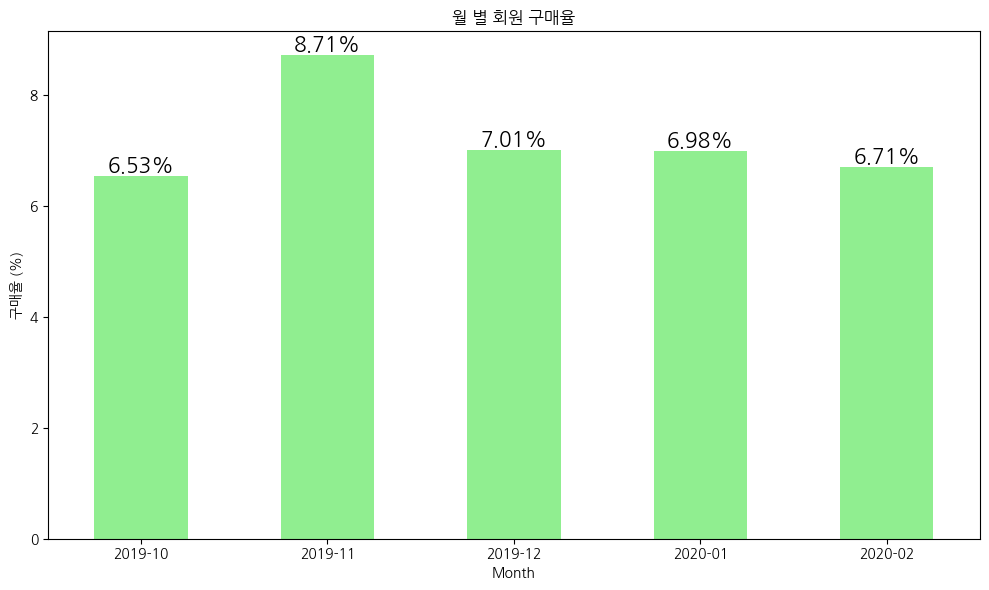

In [ ]:
# 월 별 회원 구매율을 그래프로 작성

plt.figure(figsize=(10, 6))
monthly_purchase_rate.plot(kind='bar', color = 'lightgreen')
plt.title('월 별 회원 구매율')
plt.xlabel('Month')
plt.ylabel('구매율 (%)')
plt.xticks(rotation=0)
for i, v in enumerate(monthly_purchase_rate):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom', fontsize=15)
plt.tight_layout()
plt.show()

In [27]:
# 일 별 회원 구매율
df['date'] = pd.to_datetime(df['date'])

purchase_df['date'] = pd.to_datetime(purchase_df['date'])

daily_purchase = purchase_df.groupby('date')['user_id'].nunique()
daily_total_users = df.groupby('date')['user_id'].nunique()

daily_purchase_rate = (daily_purchase / daily_total_users) * 100
daily_purchase_rate

<ipython-input-27-36b071862549>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['date'] = pd.to_datetime(purchase_df['date'])


,user_id
date,
2019-10-01,5.277115
2019-10-02,3.110127
2019-10-03,6.504167
2019-10-04,6.148282
2019-10-05,4.791723
...,...
2020-02-25,5.546278
2020-02-26,5.514725
2020-02-27,5.558300


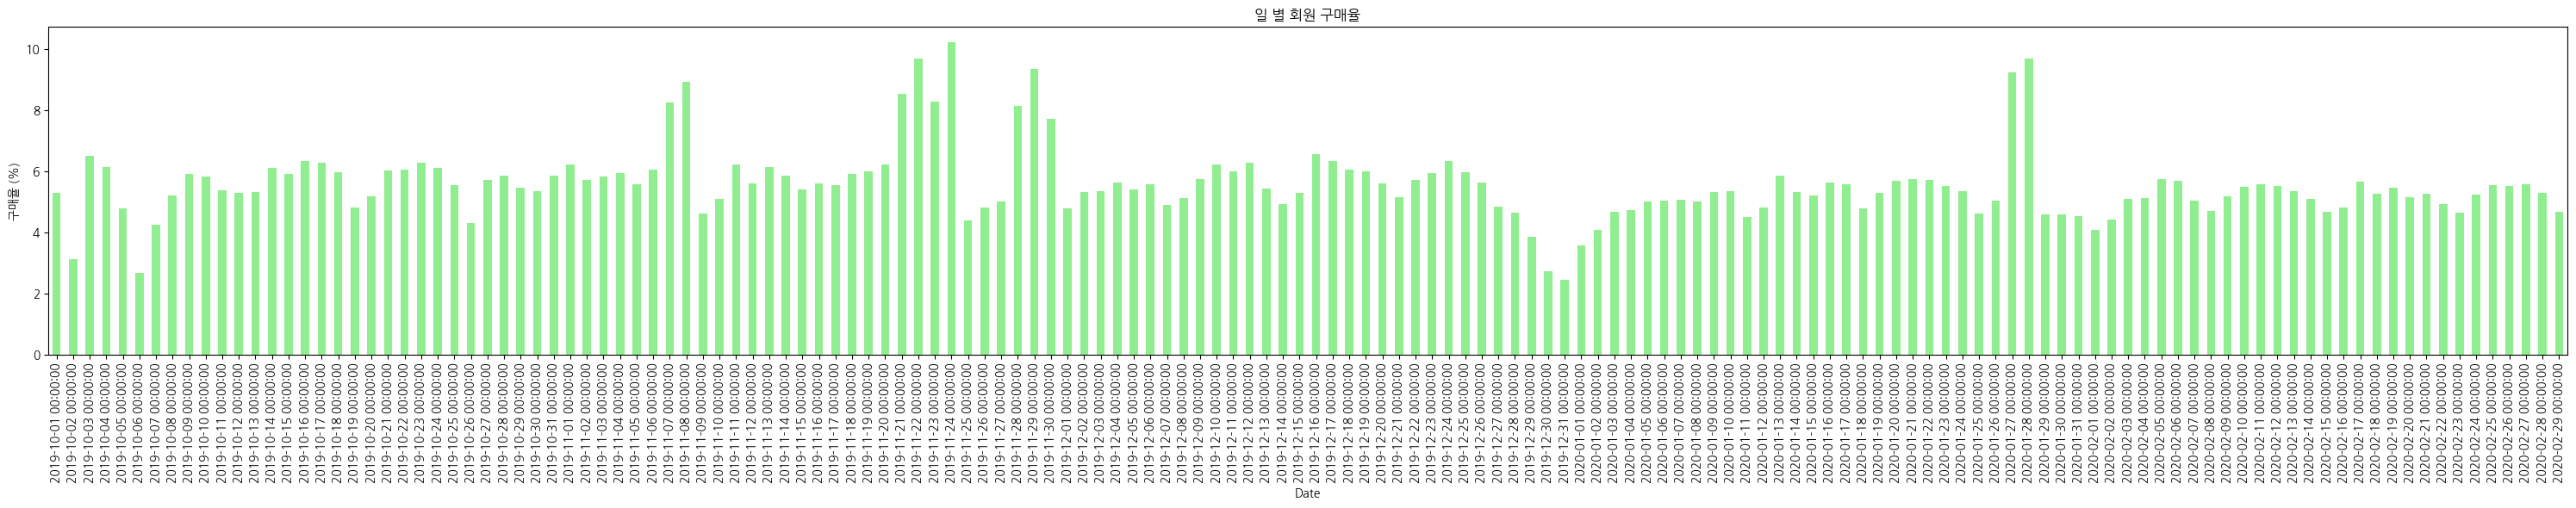

In [ ]:
# 일 별 회원 구매율을 그래프로 작성

plt.figure(figsize=(30, 6))
daily_purchase_rate.plot(kind='bar', color = 'lightgreen')
plt.title('일 별 회원 구매율')
plt.xlabel('Date')
plt.ylabel('구매율 (%)')
plt.tight_layout()
plt.show()

In [ ]:
daily_purchase_rate[daily_purchase_rate == min(daily_purchase_rate)], daily_purchase_rate[daily_purchase_rate == max(daily_purchase_rate)]

(date
 2019-12-31    2.457778
 Name: user_id, dtype: float64,
 date
 2019-11-24    10.205411
 Name: user_id, dtype: float64)

## 2. 원인 도출 : funnel 분석을 통한 회원 구매율 감소 원인 도출

### 월 별 이벤트 분석

In [ ]:
## 월 별 이벤트 수 확인
event_count_sum = df.groupby('month')['event_type'].count()
event_count_sum

,event_type
month,
2019-10,3823729
2019-11,4315566
2019-12,3292683
2020-01,3967135
2020-02,3841573


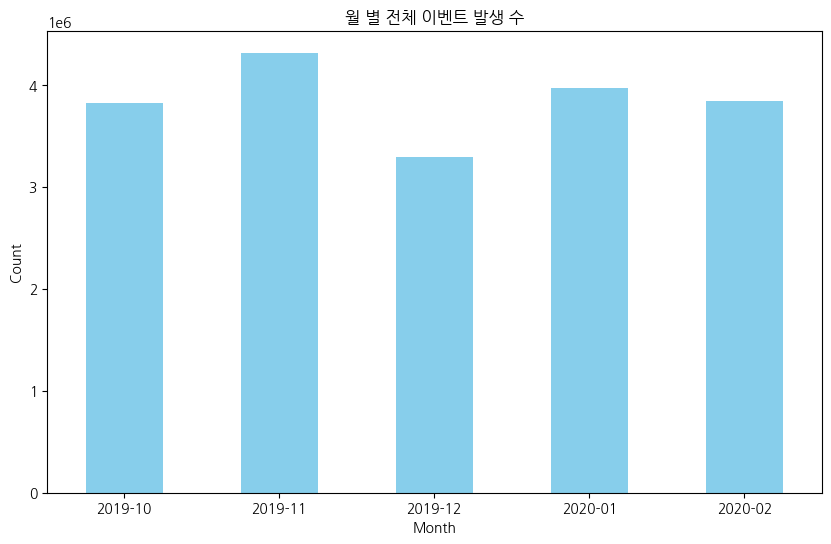

In [ ]:
# 월 별 전체 이벤트 수 표로 나타내기

plt.figure(figsize=(10, 6))
event_count_sum.plot(kind='bar', color = 'skyblue')
plt.title('월 별 전체 이벤트 발생 수')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- 전체 이벤트 수는 구매율과 다르게 2019-12월이 가장 낮고, 2020-01에 상승한다.
그렇다면, 각 이벤트 별로 쪼개보자

In [ ]:
## 월 별 각 이벤트 수 확인
event_count = df.groupby('month')['event_type'].value_counts()
event_count

month    event_type      
2019-10  view                1818922
         cart                1190809
         remove_from_cart     572010
         purchase             241988
2019-11  view                2027084
         cart                1275382
         remove_from_cart     694814
         purchase             318286
2019-12  view                1689479
         cart                 901187
         remove_from_cart     491670
         purchase             210347
2020-01  view                1989423
         cart                1114449
         remove_from_cart     603500
         purchase             259763
2020-02  view                1902218
         cart                1104749
         remove_from_cart     596163
         purchase             238443
Name: count, dtype: int64

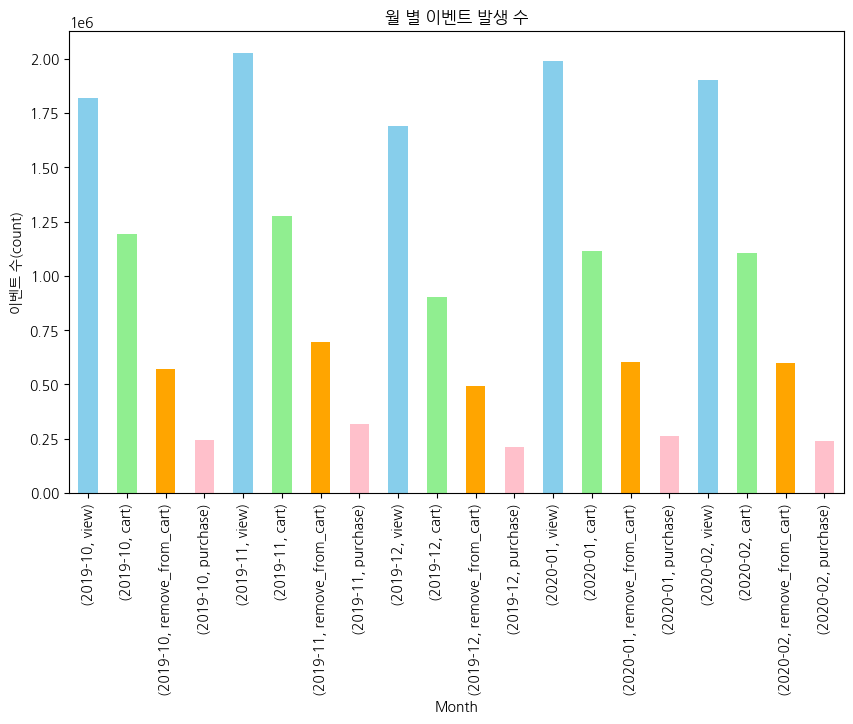

In [ ]:
# 월 별 각 이벤트 수 표로 나타내기

plt.figure(figsize=(10, 6))
event_count.plot(kind='bar', color = ['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('월 별 이벤트 발생 수')
plt.xlabel('Month')
plt.ylabel('이벤트 수(count)')
plt.xticks()
plt.show()

- 월 별로 이벤트 수가 회원 구매율 추이와 맞지 않는다. 회원 별로 보았을 때와 비교해보자

In [ ]:
## 월 별 이벤트 발생 회원
event_count_user = df.groupby('month')['user_id'].nunique()
event_count_user

,user_id
month,
2019-10,391468
2019-11,359951
2019-12,362517
2020-01,401807
2020-02,381245


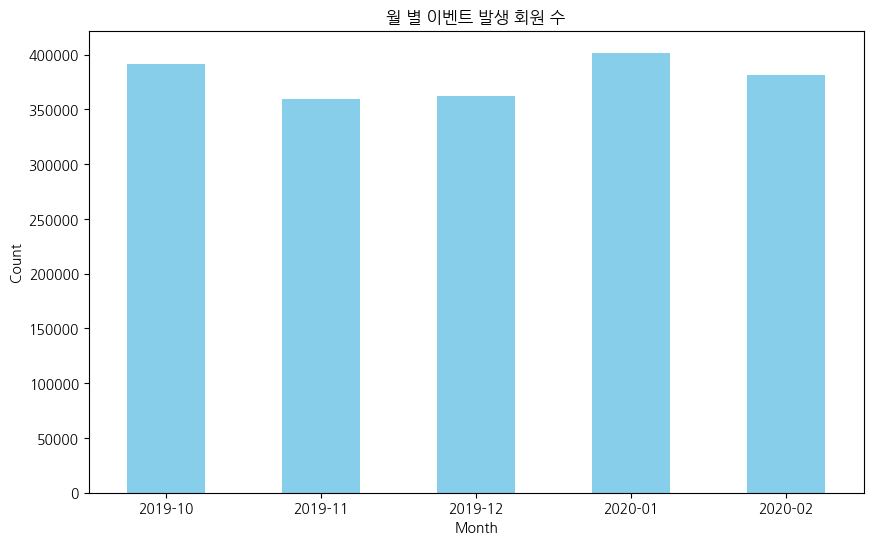

In [ ]:
# 그래프 확인

plt.figure(figsize=(10, 6))
event_count_user.plot(kind='bar', color = 'skyblue')
plt.title('월 별 이벤트 발생 회원 수')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## 월 별 각 이벤트 발생 회원
event_users = df.groupby(['month', 'event_type'])['user_id'].nunique()
event_users

month    event_type      
2019-10  cart                132779
         purchase             25577
         remove_from_cart     46745
         view                379999
2019-11  cart                 95229
         purchase             31338
         remove_from_cart     54273
         view                347181
2019-12  cart                 82738
         purchase             25411
         remove_from_cart     44906
         view                350423
2020-01  cart                 91871
         purchase             28033
         remove_from_cart     50746
         view                389336
2020-02  cart                 88397
         purchase             25567
         remove_from_cart     48661
         view                369237
Name: user_id, dtype: int64

In [ ]:
# evnet_type = [view, cart, remove_from_cart, purchase] 순으로 바꾸기

event_users = event_users.unstack()
event_users

event_type,cart,purchase,remove_from_cart,view
month,,,,
2019-10,132779,25577,46745,379999
2019-11,95229,31338,54273,347181
2019-12,82738,25411,44906,350423
2020-01,91871,28033,50746,389336
2020-02,88397,25567,48661,369237


In [ ]:
# event_users의 event_type 순서를 [view, cart, remove_from_cart, purchase]로 바꾸기

event_users = event_users[['view', 'cart', 'remove_from_cart', 'purchase']]
event_users

event_type,view,cart,remove_from_cart,purchase
month,,,,
2019-10,379999,132779,46745,25577
2019-11,347181,95229,54273,31338
2019-12,350423,82738,44906,25411
2020-01,389336,91871,50746,28033
2020-02,369237,88397,48661,25567


<Figure size 1000x600 with 0 Axes>

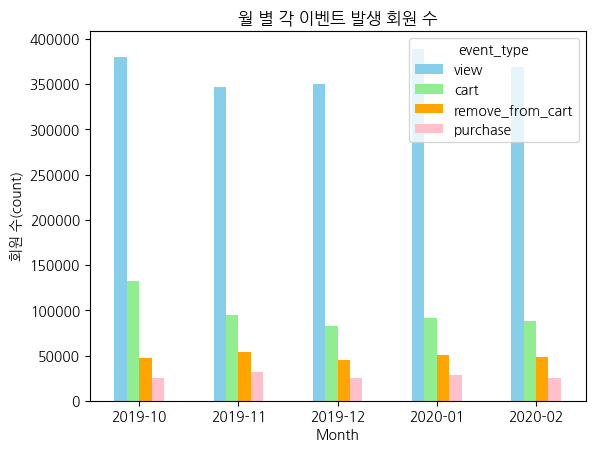

In [ ]:
## 그래프

plt.figure(figsize=(10, 6))
event_users.plot(kind='bar', color = ['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('월 별 각 이벤트 발생 회원 수')
plt.xlabel('Month')
plt.ylabel('회원 수(count)')
plt.xticks(rotation=0)
plt.show()

- 신기한 결과가 나왔다. 회원 수로 확인을 해보니, 각 월마다 view, cart, remove_cart 고객보다 purchase를 하는 고객이 훨씬 다양하다.


이는 상품 조회와 장바구니 이동 후 바로 구매를 하는 것이 아니라 구매로 이어지기 까지 시간이 걸린다는 뜻일까?

### 퍼널 분석

In [ ]:
funnel_df = df.groupby('event_type')['user_id'].nunique()
funnel_df

,user_id
event_type,
cart,394864
purchase,109677
remove_from_cart,181824
view,1562645


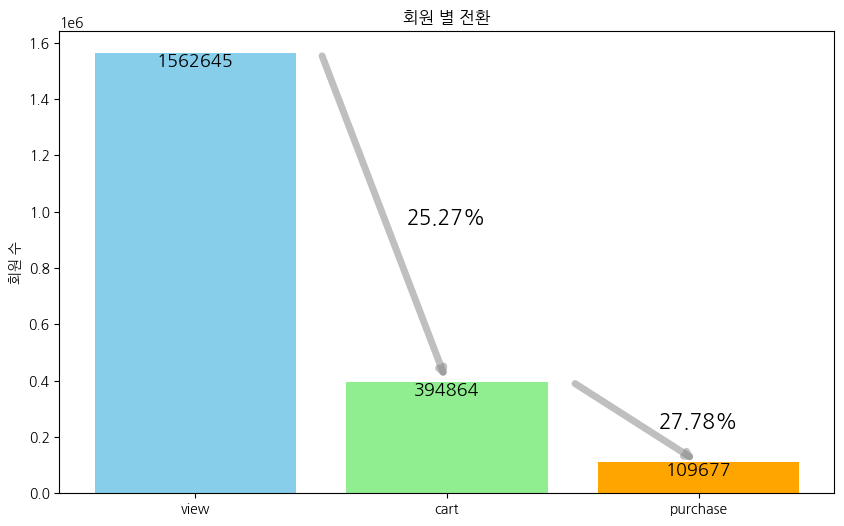

In [ ]:
# 퍼널 시각화
import matplotlib.patches as patches

# 퍼널 단계 및 값 정의
stages = ['view', 'cart',  'purchase']
values = funnel_df.loc[stages].values

# 퍼널 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(stages, values, color=['skyblue', 'lightgreen', 'orange'])

# 전환율 계산 및 표시
for i in range(1, len(stages)):
    funnel_count = values[i]
    conversion_rate = values[i] / values[i - 1] * 100
    arrow = patches.FancyArrowPatch(
        (i - 0.5, values[i - 1]),
        (i , values[i]),
        arrowstyle='->',
        mutation_scale=10,
        color='gray',
        lw=5,
        alpha=0.5)
    ax.add_patch(arrow)
    ax.text(i, (values[i - 1] + values[i]) / 2, f"{conversion_rate:.2f}%", ha='center', va='center', fontsize = 15)

for i, v in enumerate(values):
    plt.text(i, v, f"{v}", ha='center', va='top', fontsize=13)

# 차트 설정
ax.set_title('회원 별 전환')
ax.set_ylabel('회원 수')
plt.show()

- 회원 별로 view에서 purchase까지 도달하는 비율은 많지 않다. cart에서 약 75%가 이탈한다.
- cart에서 purchase로 또한 28% 정도만 전환된다.

...? 머지 ㅅㅂ 위 데이터랑 안맞는 거 같은데 아오아오

### 동일 세션 내 퍼널 분석

In [ ]:
# 1. 상품을 조회환 세션
view_df = df[df['event_type'] == 'view']
view_df['user_session'].nunique()

4177418

In [ ]:
view_session_count = view_df.groupby('user_session')['user_id'].nunique()
len(view_session_count)

4177418

In [ ]:
view_session_count

,user_id
user_session,
0000061d-f3e9-484b-8c73-e54f355032a3,1
00000ac8-0015-4f12-996a-be2896323738,1
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1
000013d6-68a4-40cf-9452-6577dbfab515,1
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,1
...,...
fffff319-41b2-4937-96bb-ac4aace7c300,1
fffff363-1257-4982-9e4f-da3b99b0719d,1
fffffa85-9968-4a7c-aac4-beb0a1992bbd,1


In [ ]:
view_df['user_session'].value_counts()

,count
user_session,
dee05e29-f331-48dc-b1b3-547985fc2aa4,4460
5605b843-56e4-4cb5-a53c-53a33d288f2d,1532
5046736d-a365-4b6b-ae48-e7147ee3be3c,1169
c5643d68-0641-4f40-9f1e-7019a49ec320,1162
5b9bcf07-5c80-4f98-84dd-cad0883e0477,1074
...,...
49bc0a4f-d4da-4313-bb06-8d6c7cf4bd29,1
eb034fe8-6cdd-41f2-8c43-1ed6bbfeced1,1
ba5f1397-eb0a-42da-9ddd-fd2c207f0d98,1


In [ ]:
view_df['user_id'].value_counts()

,count
user_id,
527021202,20492
583884978,9410
557616099,9191
550388516,7538
557956487,6916
...,...
557344159,1
557344183,1
557344224,1


In [ ]:
view_session = view_df['user_session']
view_session

,user_session
1,8adff31e-2051-4894-9758-224bfa8aec18
3,722ffea5-73c0-4924-8e8f-371ff8031af4
4,28172809-7e4a-45ce-bab0-5efa90117cd5
5,38cf4ba1-4a0a-4c9e-b870-46685d105f95
7,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...
19240678,fc7063a6-b45e-4863-babb-da4934b83388
19240679,2806ff10-08bc-4811-9ab7-af074fe22a88
19240680,2806ff10-08bc-4811-9ab7-af074fe22a88
19240681,dcf90ff3-a246-4b00-b39a-83e6444a0769


In [ ]:
# 2. 상품 조회에서 cart로 전환된 세션 비율

cart_df = df[df['event_type'] == 'cart']
cart_df['user_session'].nunique()

975960

In [ ]:
veiw_session = set(view_df['user_session'])
cart_session = set(cart_df['user_session'])

intersection = veiw_session.intersection(cart_session)

len(intersection)

777893

In [ ]:
## 3. cart에서 purchase로 이어진 세션

purchase_df = df[df['event_type'] == 'purchase']

In [ ]:
purchase_session = set(purchase_df['user_session'])

intersection_2 = intersection.intersection(purchase_session)

len(intersection_2)

105037

In [ ]:
# 퍼널 단계 및 값 정의
stages = ['view', 'cart',  'purchase']
values = intersection_2.loc[stages].values

# 퍼널 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 그리기
bars = ax.bar(stages, values, color=['skyblue', 'lightgreen', 'orange'])

# 전환율 계산 및 표시
for i in range(1, len(stages)):
    funnel_count = values[i]
    conversion_rate = values[i] / values[i - 1] * 100
    arrow = patches.FancyArrowPatch(
        (i - 0.5, values[i - 1]),
        (i , values[i]),
        arrowstyle='->',
        mutation_scale=10,
        color='gray',
        lw=5,
        alpha=0.5)
    ax.add_patch(arrow)
    ax.text(i, (values[i - 1] + values[i]) / 2, f"{conversion_rate:.2f}%", ha='center', va='center', fontsize = 15)

for i, v in enumerate(values):
    plt.text(i, v, f"{v}", ha='center', va='top', fontsize=13)

# 차트 설정
ax.set_title('세션 내 전환')
ax.set_ylabel('Count')
plt.show()

AttributeError: 'set' object has no attribute 'loc'

- 세션 내에서 각 퍼널의 전환

상푸 조회 : 4177418 \
장바구니 : 777893 \
구매 : 105037

- 전환율

view_cart : 18.62% \
cart_purchase : 13.5%

| |view|cart|purchase|view_cart_rate|cart_purcahse_rate|
|------|---|---|---|---|---|
|회원 별|1562645|394864|109677|25.27|27.78|
|세션 별|4177418|777893|105037|18.62|13.5|


- 이커머스 내의 구매율을 늘리기 위해
1. 상품 view를 늘린다.
2. 각 단계 사이의 전환율을 올린다.

  2-1. view to cart 전환율 상승

  2-2. cart to purchase 전환율 상승

## 지표 설정

  - 해당 데이터에서는 view를 늘리기위한 고객의 유입이나, 다른 정보를 알 수 없으므로 2번의 각 단계의 전환율을 높이는 것을 방법으로 채택한다.
  1. 조회 -> 장바구니 전환
  2. 장바구니 -> 구매 전환
  
  => 장바구니 구매 전환율을 지표로 설정


## 분석 : 코호트 별 장바구니 방문 기간 분석

- 코호트 : 첫 활성 시기(주)
  
  => 문제 : 활성 시기가 데이터 기간보다 이전이라 데이터 상에서는 view가 먼저가 아닌 데이터가 존재함
  


In [ ]:
df['user_id'].nunique()

1604645

- 160만 명의 고객 : 고객 데이터가 따로 있는 것이 아니기 때문에 event가 발생한 고객을 전체 고객이라고 가정하고 분석을 진행한다.

In [ ]:
# 코호트 별 회원 : 상품 조회가 처음 일어난 시기로 고객 분류

# df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W')

In [ ]:
## 활성 시기(1) : 월 별로 나누기

df = df.sort_values(by=['date', 'time']) # 먼저 날짜와 시간 기준으로 정렬

cohort_users_month = df.groupby('user_id')[['event_type','month']].first().reset_index()

In [ ]:
cohort_users_month.sort_values(by='month')

,user_id,event_type,month
592766,562373596,view,2019-10
406666,555767935,view,2019-10
406665,555767919,view,2019-10
406664,555767876,view,2019-10
406663,555767863,view,2019-10
...,...,...,...
1411011,609648953,view,2020-02
1411010,609648905,view,2020-02
1411009,609648829,view,2020-02
1411015,609648991,view,2020-02


In [ ]:
cohort_users_month['event_type'].value_counts()

,count
event_type,
view,1469399
cart,124774
remove_from_cart,9892
purchase,580


- 150만 명 가량의 고객은 데이터 기간 내 처음 활성(view)함
- 13만 명 가량의 고객은 데이터 기간 전에 처음 활성(view) 후 cart, cart 제거, purchase 등의 이벤트 발생
---

이전에 활성(view)이 일어난 유저끼리 활성 코호트로 묶기

In [ ]:
# 첫 이벤트 뷰 아닌 것 분리 : 임의로 2019-09로 설정
month_cohort1 = cohort_users_month[cohort_users_month['event_type'] != 'view']
month_cohort1

,user_id,event_type,month
7,4103071,cart,2019-10
9,4661182,cart,2019-12
13,6217356,cart,2019-11
20,9794320,cart,2019-10
21,10079204,cart,2019-11
...,...,...,...
1604574,622082232,cart,2020-02
1604585,622083330,cart,2020-02
1604589,622083836,cart,2020-02
1604601,622084975,cart,2020-02


In [ ]:
cohort_users_month2 = cohort_users_month[cohort_users_month['event_type'] == 'view']
cohort_users_month2

,user_id,event_type,month
0,465496,view,2020-01
1,1120748,view,2019-11
2,1180452,view,2019-12
3,1458813,view,2019-11
4,2038666,view,2020-02
...,...,...,...
1604640,622090016,view,2020-02
1604641,622090043,view,2020-02
1604642,622090052,view,2020-02
1604643,622090098,view,2020-02


In [ ]:
# 코호트 별 데이터 분리

month_cohort2 = cohort_users_month2[cohort_users_month2['month'] == '2019-10']
month_cohort3 = cohort_users_month2[cohort_users_month2['month'] == '2019-11']
month_cohort4 = cohort_users_month2[cohort_users_month2['month'] == '2019-12']
month_cohort5 = cohort_users_month2[cohort_users_month2['month'] == '2020-01']
month_cohort6 = cohort_users_month2[cohort_users_month2['month'] == '2020-02']

In [ ]:
# 코호트 별 고객 수
cohort_counts = cohort_users_month2['month'].value_counts().sort_index()
cohort_counts

,count
month,
2019-10,354803
2019-11,276642
2019-12,270894
2020-01,297842
2020-02,269218


In [ ]:
cohort_counts['2019-09'] = month_cohort1['user_id'].count()

In [ ]:
cohort_counts = cohort_counts.sort_index()
cohort_counts

,count
month,
2019-09,135246
2019-10,354803
2019-11,276642
2019-12,270894
2020-01,297842
2020-02,269218


In [ ]:
sum(cohort_counts)

1604645

In [ ]:
## 코호트 별 장바구니 방문 리텐션 확인 : 클래식 리텐션

cohort_retention = pd.DataFrame()

for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    retention_data = []
    for month in pd.period_range('2019-09', '2020-02', freq='M'):
        month_df = df[(df['month'] == month) & ((df['event_type'] == 'cart') | (df['event_type'] == 'remove_from_cart') | (df['event_type'] == 'purchase'))]
        active_users = month_df[month_df['user_id'].isin(cohort_users)]['user_id'].nunique()
        retention_rate = active_users / len(cohort_users)
        retention_data.append(retention_rate)
    cohort_retention[f'Cohort {i+1}'] = retention_data

# 결과 출력
cohort_retention.index = pd.period_range('2019-09', '2020-02', freq='M')
cohort_retention

,Cohort 1,Cohort 2,Cohort 3,Cohort 4,Cohort 5,Cohort 6
2019-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10,0.271099,0.276965,0.000000,0.000000,0.000000,0.000000
2019-11,0.288800,0.052237,0.144888,0.000000,0.000000,0.000000
2019-12,0.243963,0.033729,0.032070,0.115787,0.000000,0.000000
2020-01,0.266921,0.030727,0.023203,0.023747,0.115581,0.000000
2020-02,0.247312,0.026750,0.018887,0.015482,0.025718,0.115237


- Cohort1의 데이터 값이 두드러지게 크다. . .

In [ ]:
## 활성 유저 수 확인

cohort_retention = pd.DataFrame()

for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    retention_data = []
    for month in pd.period_range('2019-09', '2020-02', freq='M'):
        month_df = df[(df['month'] == month) & ((df['event_type'] == 'cart') | (df['event_type'] == 'remove_from_cart') | (df['event_type'] == 'purchase'))]
        active_users = month_df[month_df['user_id'].isin(cohort_users)]['user_id'].nunique()
        retention_rate = active_users
        retention_data.append(retention_rate)
    cohort_retention[f'Cohort {i+1}'] = retention_data


# 결과 출력
cohort_retention.index = pd.period_range('2019-09', '2020-02', freq='M')
cohort_retention

,Cohort 1,Cohort 2,Cohort 3,Cohort 4,Cohort 5,Cohort 6
2019-09,0,0,0,0,0,0
2019-10,36665,98268,0,0,0,0
2019-11,39059,18534,40082,0,0,0
2019-12,32995,11967,8872,31366,0,0
2020-01,36100,10902,6419,6433,34425,0
2020-02,33448,9491,5225,4194,7660,31024


- 첫 번째 코호트의 고객들은 장바구니 방문이 꾸준히 있는 것에 반면, 나머지 코호트의 고객들은 상품 조회 후 첫 달만 장바구니 방문이 존재하고, 그 이후는 현저히 줄어듦을 확인할 수 있다.
- 먼저, 각 코호트의 주 별, 일 별 장바구니 방문을 확인해보고, 코호트1과 나머지를 분리해서 분석해야 할 것 같다.

In [ ]:
## 주 별 장바구니 방문 확인
cohort_retention_weekly = pd.DataFrame()

for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    retention_data = []
    for week in pd.period_range('2019-10', '2020-03', freq='W'):
        week_df = df[(df['week'] == week) & ((df['event_type'] == 'cart') | (df['event_type'] == 'remove_from_cart') | (df['event_type'] == 'purchase'))]
        active_users = week_df[week_df['user_id'].isin(cohort_users)]['user_id'].nunique()
        retention_rate = active_users / len(cohort_users)
        retention_data.append(retention_rate)
    cohort_retention_weekly[f'Cohort {i+1}'] = retention_data

# 결과 출력
cohort_retention_weekly.index = pd.period_range('2019-10', '2020-03', freq='W')
cohort_retention_weekly

In [ ]:
## 일 별로 장바구니 방문 확인

cohort_retention_daily = pd.DataFrame()

for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    retention_data = []
    for day in pd.period_range('2019-10-01', '2020-02-29', freq='D'):
        day_df = df[(df['date'].dt.to_period('D') == day) &
                    ((df['event_type'] == 'cart') |
                     (df['event_type'] == 'remove_from_cart') |
                     (df['event_type'] == 'purchase'))]
        active_users = day_df[day_df['user_id'].isin(cohort_users)]['user_id'].nunique()
        retention_rate = active_users / len(cohort_users)
        retention_data.append(retention_rate)
    cohort_retention_daily[f'Cohort {i+1}'] = retention_data

# 결과 출력
cohort_retention_daily.index = pd.period_range('2019-10-01', '2020-02-29', freq='D')
cohort_retention_daily

,Cohort 1,Cohort 2,Cohort 3,Cohort 4,Cohort 5,Cohort 6
2019-10-01,0.016696,0.016175,0.000000,0.000000,0.000000,0.000000
2019-10-02,0.017228,0.056457,0.000000,0.000000,0.000000,0.000000
2019-10-03,0.015964,0.008292,0.000000,0.000000,0.000000,0.000000
2019-10-04,0.014233,0.006294,0.000000,0.000000,0.000000,0.000000
2019-10-05,0.011875,0.009064,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2020-02-25,0.015586,0.002317,0.001189,0.000960,0.001410,0.005609
2020-02-26,0.015010,0.002193,0.001124,0.000908,0.001259,0.005709
2020-02-27,0.014559,0.002055,0.001150,0.001000,0.001373,0.006077
2020-02-28,0.013080,0.002001,0.001113,0.000853,0.001178,0.005731


In [ ]:
## 유의미한 기간동안만 일 별 장바구니 방문 확인


# 코호트 리스트 및 시작일 설정
cohort_list = [month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]
cohort_start_dates = ['2019-10-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01']

# 각 코호트별 결과를 저장할 리스트
cohort_retention_tables = []

# 각 코호트에 대해 개별 테이블을 생성
for i, (cohort, start_date_str) in enumerate(zip(cohort_list, cohort_start_dates)):
    cohort_users = cohort['user_id'].unique()
    retention_data = []

    # 각 코호트의 시작일과 28일 후의 날짜 설정
    start_date = pd.to_datetime(start_date_str)
    end_date = start_date + pd.Timedelta(days=27)  # 4주차 (28일)까지 계산

    # 일별 기간 생성
    for day in pd.date_range(start=start_date, end=end_date):
        day_df = df[(df['date'] == day) &
                    ((df['event_type'] == 'cart') |
                     (df['event_type'] == 'remove_from_cart') |
                     (df['event_type'] == 'purchase'))]
        active_users = day_df[day_df['user_id'].isin(cohort_users)]['user_id'].nunique()
        retention_rate = active_users / len(cohort_users)
        retention_data.append(retention_rate)

    # 해당 코호트의 일별 리텐션율을 DataFrame으로 저장
    cohort_retention = pd.DataFrame({f'Cohort {i+1}': retention_data})
    cohort_retention.index = pd.date_range(start=start_date, end=end_date)

    # 결과 테이블을 리스트에 저장
    cohort_retention_tables.append(cohort_retention)

# 각 코호트 테이블 출력
for i, cohort_table in enumerate(cohort_retention_tables):
    print(f"Retention Table for Cohort {i+1} ({cohort_start_dates[i]}):")
    print(cohort_table)
    print("\n")

Retention Table for Cohort 1 (2019-10-01):
            Cohort 1
2019-10-01  0.016696
2019-10-02  0.017228
2019-10-03  0.015964
2019-10-04  0.014233
2019-10-05  0.011875
2019-10-06  0.014699
2019-10-07  0.018026
2019-10-08  0.016200
2019-10-09  0.016999
2019-10-10  0.015320
2019-10-11  0.013494
2019-10-12  0.013095
2019-10-13  0.013553
2019-10-14  0.015949
2019-10-15  0.015638
2019-10-16  0.015690
2019-10-17  0.014655
2019-10-18  0.013146
2019-10-19  0.011653
2019-10-20  0.012954
2019-10-21  0.016008
2019-10-22  0.014507
2019-10-23  0.015135
2019-10-24  0.014056
2019-10-25  0.012777
2019-10-26  0.011912
2019-10-27  0.013871
2019-10-28  0.014559


Retention Table for Cohort 2 (2019-10-01):
            Cohort 2
2019-10-01  0.016175
2019-10-02  0.056457
2019-10-03  0.008292
2019-10-04  0.006294
2019-10-05  0.009064
2019-10-06  0.049867
2019-10-07  0.031457
2019-10-08  0.015831
2019-10-09  0.007926
2019-10-10  0.007537
2019-10-11  0.006784
2019-10-12  0.006060
2019-10-13  0.006666
2019-10-1

In [ ]:
## +a ) view에서 바로 puchase도 가능할까?

# 세션 내에서 view -> purchase 전환 확인
session_conversion = df.groupby(['user_id', 'user_session'])['event_type'].apply(list)
direct_session_conversion = session_conversion.apply(lambda x: 'view' in x and 'purchase' in x and 'cart' not in x and 'remove_from_cart' not in x)

# 비율 계산
session_conversion_rate = direct_session_conversion.mean()
print(f"세션 내에서 View에서 바로 Purchase로 넘어간 비율: {session_conversion_rate * 100:.2f}%")

세션 내에서 View에서 바로 Purchase로 넘어간 비율: 0.12%


- view에서 purchawe가 바로 가능하지만, 장바구니 구매 전환을 지표로 설정했고, 해당 수치가 높지도 않아서 중요하지는 않은 것으로 판단.

### 장바구니 방문과 구매 상관 관계 파악 1

In [ ]:
## 코호트 별 장바구니 구매 전환 : 주차별

cohort_conversion_weekly = pd.DataFrame()

# 각 월별 코호트에 대해 주간 구매 전환율 계산
for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    conversion_data = []

    for week in pd.period_range('2019-10', '2020-03', freq='W'):
        # 장바구니 관련 이벤트 필터링
        week_df = df[(df['week'] == week) &
                     ((df['event_type'] == 'cart') |
                      (df['event_type'] == 'remove_from_cart') |
                      (df['event_type'] == 'purchase'))]

        # 구매 이벤트 필터링
        purchase_df = df[(df['week'] == week) & (df['event_type'] == 'purchase')]

        # 해당 주차에 활성화된 사용자 수
        active_users = week_df[week_df['user_id'].isin(cohort_users)]['user_id'].nunique()

        # 해당 주차에 구매한 사용자 수
        purchase_users = purchase_df[purchase_df['user_id'].isin(cohort_users)]['user_id'].nunique()

        # 구매 전환율 계산
        if active_users > 0:
            conversion_rate = purchase_users / active_users
        else:
            conversion_rate = 0  # active_users가 0인 경우 전환율을 0으로 설정

        conversion_data.append(conversion_rate)

    # 각 코호트의 주별 구매 전환율을 DataFrame에 저장
    cohort_conversion_weekly[f'Cohort {i+1}'] = conversion_data

# 결과 출력
cohort_conversion_weekly.index = pd.period_range('2019-10', '2020-03', freq='W')
cohort_conversion_weekly

,Cohort 1,Cohort 2,Cohort 3,Cohort 4,Cohort 5,Cohort 6
2019-09-30/2019-10-06,0.249772,0.059247,0.000000,0.000000,0.000000,0.000000
2019-10-07/2019-10-13,0.249732,0.143617,0.000000,0.000000,0.000000,0.000000
2019-10-14/2019-10-20,0.251756,0.257125,0.000000,0.000000,0.000000,0.000000
2019-10-21/2019-10-27,0.242948,0.256380,0.000000,0.000000,0.000000,0.000000
2019-10-28/2019-11-03,0.245429,0.261324,0.235999,0.000000,0.000000,0.000000
2019-11-04/2019-11-10,0.264540,0.286700,0.259597,0.000000,0.000000,0.000000
2019-11-11/2019-11-17,0.249256,0.261367,0.250593,0.000000,0.000000,0.000000
2019-11-18/2019-11-24,0.296136,0.336996,0.294140,0.000000,0.000000,0.000000
2019-11-25/2019-12-01,0.258716,0.291147,0.270833,0.224277,0.000000,0.000000
2019-12-02/2019-12-08,0.240860,0.247073,0.233880,0.245017,0.000000,0.000000


In [ ]:
## 코호트 별 장바구니 구매 전환 : 일 별

cohort_conversion_daily = pd.DataFrame()

# 각 월별 코호트에 대해 일간 구매 전환율 계산
for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    conversion_data = []

    for day in pd.date_range('2019-10-01', '2020-03-31', freq='D'):
        # 장바구니 관련 이벤트 필터링
        day_df = df[(df['date'] == day) &
                    ((df['event_type'] == 'cart') |
                     (df['event_type'] == 'remove_from_cart') |
                     (df['event_type'] == 'purchase'))]

        # 구매 이벤트 필터링
        purchase_df = df[(df['date'] == day) & (df['event_type'] == 'purchase')]

        # 해당 일에 활성화된 사용자 수
        active_users = day_df[day_df['user_id'].isin(cohort_users)]['user_id'].nunique()

        # 해당 일에 구매한 사용자 수
        purchase_users = purchase_df[purchase_df['user_id'].isin(cohort_users)]['user_id'].nunique()

        # 구매 전환율 계산
        if active_users > 0:
            conversion_rate = purchase_users / active_users
        else:
            conversion_rate = 0  # active_users가 0인 경우 전환율을 0으로 설정

        conversion_data.append(conversion_rate)

    # 각 코호트의 일별 구매 전환율을 DataFrame에 저장
    cohort_conversion_daily[f'Cohort {i+1}'] = conversion_data

# 결과 출력
cohort_conversion_daily.index = pd.date_range('2019-10-01', '2020-03-31', freq='D')
cohort_conversion_daily

,Cohort 1,Cohort 2,Cohort 3,Cohort 4,Cohort 5,Cohort 6
2019-10-01,0.215235,0.088691,0.0,0.0,0.0,0.0
2019-10-02,0.215451,0.026808,0.0,0.0,0.0,0.0
2019-10-03,0.210283,0.198504,0.0,0.0,0.0,0.0
2019-10-04,0.212987,0.212270,0.0,0.0,0.0,0.0
2019-10-05,0.178082,0.129975,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-03-27,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-03-28,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-03-29,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-03-30,0.000000,0.000000,0.0,0.0,0.0,0.0


### 장바구니 방문과 구매 상관 관계 파악 2

In [ ]:
## 상관 관계

# 주 별 장바구니 방문 및 구매 확인
cohort_cart_visit_weekly = pd.DataFrame()
cohort_purchase_weekly = pd.DataFrame()

for i, cohort in enumerate([month_cohort1, month_cohort2, month_cohort3, month_cohort4, month_cohort5, month_cohort6]):
    cohort_users = cohort['user_id'].unique()
    cart_visit_data = []
    purchase_data = []

    for week in pd.period_range('2019-10', '2020-03', freq='W'):
        week_df = df[(df['week'] == week)]

        # 장바구니 방문
        cart_visits = week_df[(week_df['event_type'] == 'cart') | (week_df['event_type'] == 'remove_from_cart') & (week_df['user_id'].isin(cohort_users))]['user_id'].nunique()
        cart_visit_data.append(cart_visits)

        # 구매
        purchases = week_df[(week_df['event_type'] == 'purchase') & (week_df['user_id'].isin(cohort_users))]['user_id'].nunique()
        purchase_data.append(purchases)

    cohort_cart_visit_weekly[f'Cohort {i+1} Cart Visits'] = cart_visit_data
    cohort_purchase_weekly[f'Cohort {i+1} Purchases'] = purchase_data

# 결과 출력 (주 별 장바구니 방문과 구매)
cohort_cart_visit_weekly.index = pd.period_range('2019-10', '2020-03', freq='W')
cohort_purchase_weekly.index = pd.period_range('2019-10', '2020-03', freq='W')

# 상관 관계 계산
correlation_results = {}
for i in range(1, 7):
    correlation = cohort_cart_visit_weekly[f'Cohort {i} Cart Visits'].corr(cohort_purchase_weekly[f'Cohort {i} Purchases'])
    correlation_results[f'Cohort {i}'] = correlation

# 상관 관계 결과 출력
correlation_results

{'Cohort 1': 0.3430037703059682,
 'Cohort 2': 0.391687093876324,
 'Cohort 3': 0.028870937135571227,
 'Cohort 4': -0.2918934412788631,
 'Cohort 5': -0.07155604971860355,
 'Cohort 6': -0.09376820100949235}

## 분석2 : 세션 당 평균 이벤트 수

In [11]:
event_per_session = df.groupby(['user_session', 'date'])['event_type'].count()
event_per_session

user_session                          date      
0000061d-f3e9-484b-8c73-e54f355032a3  2020-01-16     1
00000ac8-0015-4f12-996a-be2896323738  2020-01-24     1
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04  2019-11-05     1
000013d6-68a4-40cf-9452-6577dbfab515  2019-10-23    20
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e  2019-12-20     2
                                                    ..
no_session                            2020-02-25    23
                                      2020-02-26    24
                                      2020-02-27    77
                                      2020-02-28    20
                                      2020-02-29    15
Name: event_type, Length: 4524015, dtype: int64

In [17]:
## no_session은 삭제하기
event_per_session = event_per_session[event_per_session['user_session'] != 'no_session']
event_per_session

,user_session,week,event_type
0,0000061d-f3e9-484b-8c73-e54f355032a3,2020-01-13/2020-01-19,1
1,00000ac8-0015-4f12-996a-be2896323738,2020-01-20/2020-01-26,1
2,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,2019-11-04/2019-11-10,1
3,000013d6-68a4-40cf-9452-6577dbfab515,2019-10-21/2019-10-27,20
4,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2019-12-16/2019-12-22,2
...,...,...,...
4470281,ffffeed4-b0dd-499c-ba8c-213a1ab9f50d,2019-10-14/2019-10-20,2
4470282,fffff319-41b2-4937-96bb-ac4aace7c300,2019-12-16/2019-12-22,1
4470283,fffff363-1257-4982-9e4f-da3b99b0719d,2019-12-02/2019-12-08,1
4470284,fffffa85-9968-4a7c-aac4-beb0a1992bbd,2019-10-07/2019-10-13,8


In [21]:
## 주 별 세션당평균 이벤트 수 확인

df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W')

# 세션 당 이벤트 수 계산
event_per_session = df.groupby(['user_session', 'week'])['event_type'].count().reset_index()

# 주차별 세션 당 평균 이벤트 수 계산
average_event_per_session_weekly = event_per_session.groupby('week')['event_type'].mean().reset_index()

average_event_per_session_weekly.columns = ['Week', 'Average Events per Session']
average_event_per_session_weekly

,Week,Average Events per Session
0,2019-09-30/2019-10-06,4.502723
1,2019-10-07/2019-10-13,4.446110
2,2019-10-14/2019-10-20,4.450754
3,2019-10-21/2019-10-27,4.457474
4,2019-10-28/2019-11-03,4.421303
5,2019-11-04/2019-11-10,4.763917
6,2019-11-11/2019-11-17,4.512292
7,2019-11-18/2019-11-24,4.969829
8,2019-11-25/2019-12-01,4.366878
9,2019-12-02/2019-12-08,4.201222


In [20]:
## 일 별 세션당평균 이벤트 수 확인

# 세션 당 이벤트 수 계산
event_per_session2 = df.groupby(['user_session', 'date'])['event_type'].count().reset_index()

# 주차별 세션 당 평균 이벤트 수 계산
average_event_per_session_daliy = event_per_session2.groupby('date')['event_type'].mean().reset_index()

average_event_per_session_daliy.columns = ['Date', 'Average Events per Session']
average_event_per_session_daliy

,Date,Average Events per Session
0,2019-10-01,4.613629
1,2019-10-02,4.329127
2,2019-10-03,4.469410
3,2019-10-04,4.579630
4,2019-10-05,4.418531
...,...,...
147,2020-02-25,4.395057
148,2020-02-26,4.083945
149,2020-02-27,4.053815
150,2020-02-28,3.857082


from matplotlib import pyplot as plt
average_event_per_session_daliy['Average Events per Session'].plot(kind='hist', bins=20, title='Average Events per Session')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Average Events per Session']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_event_per_session_daliy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Average Events per Session')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_event_per_session_daliy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Average Events per Session']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_event_per_session_daliy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Average Events per Session')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = average_event_per_session_daliy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
average_event_per_session_daliy['Average Events per Session'].plot(kind='line', figsize=(8, 4), title='Average Events per Session')
plt.gca().spines[['top', 'right']].set_visible(False)

In [29]:
## 위의 일별 회원 구매율 불러오기

pd.DataFrame(daily_purchase_rate)

,user_id
date,
2019-10-01,5.277115
2019-10-02,3.110127
2019-10-03,6.504167
2019-10-04,6.148282
2019-10-05,4.791723
...,...
2020-02-25,5.546278
2020-02-26,5.514725
2020-02-27,5.558300
